In [ ]:
from __future__ import annotations

import pickle

import numpy as np
import qutip as qt

from mqt.yaqs import simulator
from mqt.yaqs.core.data_structures.networks import MPO, MPS
from mqt.yaqs.core.data_structures.noise_model import NoiseModel
from mqt.yaqs.core.data_structures.simulation_parameters import Observable, PhysicsSimParams
from mqt.yaqs.core.libraries.gate_library import X

# General system parameters

In [ ]:
# Define the system Hamiltonian
L = 10
J = 1
g = 0.5
H_0 = MPO()
H_0.init_ising(L, J, g)

# Define the initial state
state = MPS(L, state="zeros")

# Define the noise model
gamma_relaxation = 0.1
gamma_dephasing = 0.1
noise_model = NoiseModel(["relaxation", "dephasing"], [gamma_relaxation, gamma_dephasing])

# Define the simulation parameters
T = 1
sample_timesteps = False
N = 10001
threshold = 0
max_bond_dim = 2**L

# Generate individual TJM curves

In [ ]:
dt = 0.1
order = 2
measurements = [Observable(X(), site) for site in range(L)]
sim_params = PhysicsSimParams(measurements, T, dt, N, max_bond_dim, threshold, order, sample_timesteps=sample_timesteps)
simulator.run(state, H_0, sim_params, noise_model)
filename = "TJM_Convergence_order2_dt01.pickle"
with open(filename, "wb") as f:
    pickle.dump(
        {
            "sim_params": sim_params,
        },
        f,
    )

dt = 0.2
order = 2
measurements = [Observable(X(), site) for site in range(L)]
sim_params = PhysicsSimParams(measurements, T, dt, N, max_bond_dim, threshold, order, sample_timesteps=sample_timesteps)
simulator.run(state, H_0, sim_params, noise_model)
filename = "TJM_Convergence_order2_dt02.pickle"
with open(filename, "wb") as f:
    pickle.dump(
        {
            "sim_params": sim_params,
        },
        f,
    )

dt = 0.5
order = 2
measurements = [Observable(X(), site) for site in range(L)]
sim_params = PhysicsSimParams(measurements, T, dt, N, max_bond_dim, threshold, order, sample_timesteps=sample_timesteps)
simulator.run(state, H_0, sim_params, noise_model)
filename = "TJM_Convergence_order2_dt05.pickle"
with open(filename, "wb") as f:
    pickle.dump(
        {
            "sim_params": sim_params,
        },
        f,
    )

dt = 0.1
order = 1
measurements = [Observable(X(), site) for site in range(L)]
sim_params = PhysicsSimParams(measurements, T, dt, N, max_bond_dim, threshold, order, sample_timesteps=sample_timesteps)
simulator.run(state, H_0, sim_params, noise_model)
filename = "TJM_Convergence_order1_dt01.pickle"
with open(filename, "wb") as f:
    pickle.dump(
        {
            "sim_params": sim_params,
        },
        f,
    )

dt = 0.2
order = 1
measurements = [Observable(X(), site) for site in range(L)]
sim_params = PhysicsSimParams(measurements, T, dt, N, max_bond_dim, threshold, order, sample_timesteps=sample_timesteps)
simulator.run(state, H_0, sim_params, noise_model)
filename = "TJM_Convergence_order1_dt02.pickle"
with open(filename, "wb") as f:
    pickle.dump(
        {
            "sim_params": sim_params,
        },
        f,
    )

dt = 0.5
order = 1
measurements = [Observable(X(), site) for site in range(L)]
sim_params = PhysicsSimParams(measurements, T, dt, N, max_bond_dim, threshold, order, sample_timesteps=sample_timesteps)
simulator.run(state, H_0, sim_params, noise_model)
filename = "TJM_Convergence_order1_dt05.pickle"
with open(filename, "wb") as f:
    pickle.dump(
        {
            "sim_params": sim_params,
        },
        f,
    )

# Generate QuTip reference data

In [ ]:
# Time vector
t = np.arrange(0, sim_params.elapsed_time + sim_params.dt, 0.1)

# Define Pauli matrices
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()

# Construct the Ising Hamiltonian
H = 0
for i in range(L - 1):
    H += J * qt.tensor([sz if n == i or n == i + 1 else qt.qeye(2) for n in range(L)])
for i in range(L):
    H += g * qt.tensor([sx if n == i else qt.qeye(2) for n in range(L)])

# Construct collapse operators

# Dephasing operators
c_ops = [np.sqrt(gamma_dephasing) * qt.tensor([sz if n == i else qt.qeye(2) for n in range(L)]) for i in range(L)]

# Relaxation operators
c_ops.extend(
    np.sqrt(gamma_relaxation) * qt.tensor([qt.destroy(2) if n == i else qt.qeye(2) for n in range(L)]) for i in range(L)
)

# Initial state
psi0 = qt.tensor([qt.basis(2, 0) for _ in range(L)])

# Define measurement operators
sx_list = [qt.tensor([sx if n == i else qt.qeye(2) for n in range(L)]) for i in range(L)]

# Exact Lindblad solution
result_lindblad = qt.mesolve(H, psi0, t, c_ops, sx_list, progress_bar=True)
filename = "QuTip_exact_convergence.pickle"
with open(filename, "wb") as f:
    pickle.dump(
        {
            "sim_params": sim_params,
            "observables": result_lindblad.expect,
        },
        f,
    )

# Plot data

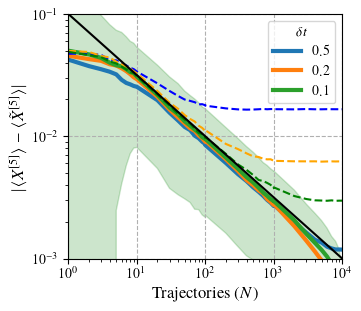

In [1]:
from plotter_convergence_single_plot import plot_convergence_data

plot_convergence_data()